<a href="https://colab.research.google.com/github/konapalask/Supervised_learning/blob/main/Cat_vs_Dog_Image_Classifier_using_CNN_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
SUPERVISED LEARNING USING DATASET


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/dogs and cats/train'
test_dir = '/content/dogs and cats/test'

train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)



Found 557 images belonging to 3 classes.
Found 140 images belonging to 3 classes.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    train_gen,
    epochs=5,
    validation_data=test_gen
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.4584 - loss: -1460.8779 - val_accuracy: 0.5000 - val_loss: -37756.5977
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.4717 - loss: -172430.0000 - val_accuracy: 0.5000 - val_loss: -1618187.3750
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5060 - loss: -3914781.0000 - val_accuracy: 0.5000 - val_loss: -19840248.0000
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.4682 - loss: -38238680.0000 - val_accuracy: 0.5000 - val_loss: -131409936.0000
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.4992 - loss: -209208176.0000 - val_accuracy: 0.5000 - val_loss: -591470720.0000


Saving download.jpg to download.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


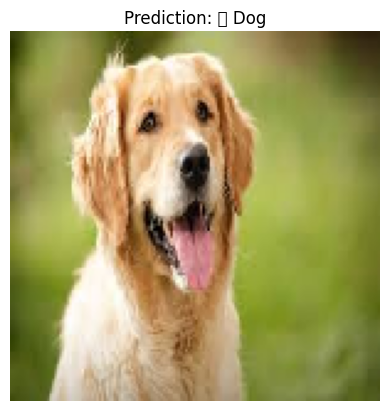

In [8]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Upload custom image
uploaded = files.upload()

# Predict function
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)[0][0]

    plt.imshow(img)
    plt.axis('off')
    plt.title("Prediction: 🐶 Dog" if prediction > 0.5 else "Prediction: 🐱 Cat")
    plt.show()

# Run for uploaded image
for fn in uploaded.keys():
    predict_image(fn)
